In [1]:
import shutil
from PIL import Image
import os, glob
from tqdm import tqdm
import numpy as np
from configs import cfg
import matplotlib.pyplot as plt

Output_path = cfg.Output_path

input_dataset = os.path.join(Output_path, "noisy")
output_dataset = os.path.join(Output_path, "clean")
print(Output_path)
print(input_dataset)
print(output_dataset)
if os.path.exists(output_dataset):
    shutil.rmtree(output_dataset)
os.mkdir(output_dataset)

../../dataset/pseudo_images/cabinet_picture_with_white_bg
../../dataset/pseudo_images/cabinet_picture_with_white_bg/noisy
../../dataset/pseudo_images/cabinet_picture_with_white_bg/clean


In [3]:
def bgcolor_white(img: np.ndarray, p:float=0.6) -> bool:
    top, bottom = img[:5].reshape(-1, 3), img[-5:].reshape(-1, 3)
    left, right = img[5:-5, :5].reshape(-1, 3), img[5:-5, -5:].reshape(-1, 3)
    side = np.concatenate([top, bottom, left, right], axis=0)
    white_part = np.sum(np.prod(side >= 240, axis=-1)).item()
    #if green_part / side.shape[0] > p:
    print(np.mean(img))
    return white_part / side.shape[0] > p and np.mean(img) <= 200

def bgcolor_green(img: np.ndarray, p:float=0.6) -> bool:
    top, bottom = img[:5].reshape(-1, 3), img[-5:].reshape(-1, 3)
    left, right = img[5:-5, :5].reshape(-1, 3), img[5:-5, -5:].reshape(-1, 3)
    side = np.concatenate([top, bottom, left, right], axis=0)
    green_part = np.sum(np.prod(side <= 200, axis=-1)).item()
    #print(green_part / side.shape[0])
    if green_part / side.shape[0] > p:
        print(np.mean(img))
    return green_part / side.shape[0] > p and np.mean(img) >= 120

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 224.99it/s]


0.0
0.7191235059760956
0.9902390438247012
0.03167330677290837
0.44322709163346613
0.32709163346613546
0.0
0.24760956175298804
0.5139442231075697
0.5390438247011953
0.01593625498007968
0.018326693227091632
0.5356573705179283
0.9561752988047809
0.5113545816733067
0.024701195219123506
Filtered 10 images, rest saved in ../../dataset/pseudo_images/bathtub/clean


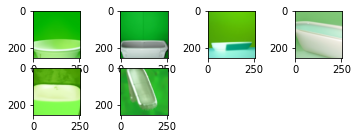

In [27]:
filtered_num = 0
filtered_file = []
Files = sorted(glob.glob(os.path.join(input_dataset, '*.jpg')))
j = 1
for rgb_file in tqdm(Files):
    img = np.array(Image.open(rgb_file))
    if not bgcolor_green(img, 0.512): # Upper and bottom line should be white
        filtered_num += 1
        filtered_file.append(rgb_file)
    else:
        plt.subplot(4,4,j)
        img = Image.fromarray(img)
        plt.imshow(img)
        j += 1
        # img.save(os.path.join(output_dataset, rgb_file.split('/')[-1]))

print("Filtered {} images, rest saved in {}".format(filtered_num, output_dataset))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 178.78it/s]


139.21236673990884
122.63687133789062
152.32633463541666
138.99461364746094
97.34060668945312
116.16518656412761
103.50946044921875
149.31905619303384
Filtered 11 images, rest saved in ../../dataset/pseudo_images/toilet/clean


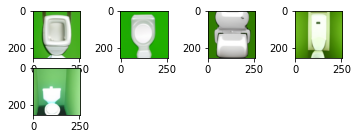

In [11]:
filtered_num = 0
filtered_file = []
Files = sorted(glob.glob(os.path.join(input_dataset, '*.jpg')))
j = 1
for rgb_file in tqdm(Files):
    img = np.array(Image.open(rgb_file))
    if not bgcolor_green(img, 0.512): # Upper and bottom line should be white
        filtered_num += 1
        filtered_file.append(rgb_file)
    else:
        plt.subplot(4,4,j)
        img = Image.fromarray(img)
        plt.imshow(img)
        j += 1
        # img.save(os.path.join(output_dataset, rgb_file.split('/')[-1]))

print("Filtered {} images, rest saved in {}".format(filtered_num, output_dataset))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 277.84it/s]


115.76381429036458
150.21289571126303
128.2487335205078
105.89986165364583
62.08040873209635
70.70185852050781
136.84061686197916
165.20404052734375
140.1082967122396
138.4745890299479
151.88838704427084
145.8367156982422
85.48185729980469
91.597900390625
Filtered 24 images, rest saved in ../../dataset/pseudo_images/sink_picture_with_green_background/clean


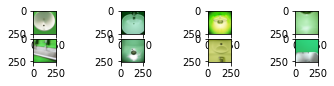

In [7]:
filtered_num = 0
filtered_file = []
Files = sorted(glob.glob(os.path.join(input_dataset, '*.jpg')))
j = 1
for rgb_file in tqdm(Files):
    img = np.array(Image.open(rgb_file))
    if not bgcolor_green(img, 0.512): # Upper and bottom line should be white
        filtered_num += 1
        filtered_file.append(rgb_file)
    else:
        plt.subplot(8,4,j)
        img = Image.fromarray(img)
        plt.imshow(img)
        j += 1
        # img.save(os.path.join(output_dataset, rgb_file.split('/')[-1]))

print("Filtered {} images, rest saved in {}".format(filtered_num, output_dataset))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 138.31it/s]


196.4057413736979
231.94146728515625
131.35687255859375
162.03992207845053
188.73206075032553
141.48068237304688
177.90962727864584
195.53540547688803
111.90848286946614
138.0101776123047
248.94557189941406
217.84391276041666
165.57320149739584
236.91625467936197
181.0191396077474
90.33798726399739
Filtered 7 images, rest saved in ../../dataset/pseudo_images/cabinet_picture_with_white_bg/clean


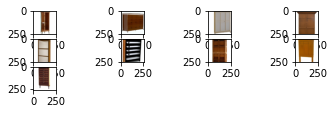

In [7]:
filtered_num = 0
filtered_file = []
Files = sorted(glob.glob(os.path.join(input_dataset, '*.jpg')))
j = 1
for rgb_file in tqdm(Files):
    img = np.array(Image.open(rgb_file))
    if not bgcolor_white(img, 0.512): # Upper and bottom line should be white
        filtered_num += 1
        filtered_file.append(rgb_file)
    else:
        plt.subplot(8,4,j)
        img = Image.fromarray(img)
        plt.imshow(img)
        j += 1
        # img.save(os.path.join(output_dataset, rgb_file.split('/')[-1]))

print("Filtered {} images, rest saved in {}".format(filtered_num, output_dataset))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 105.55it/s]


212.39586385091147
245.24198404947916
213.82523091634116
182.97687276204428
228.69195556640625
218.79098510742188
245.53422037760416
216.79776000976562
203.7961629231771
172.56348673502603
207.97648111979166
219.7337849934896
209.6756337483724
229.84381612141928
236.21710205078125
223.38016764322916
Filtered 3 images, rest saved in ../../dataset/pseudo_images/chair_picture_with_white_bg/clean


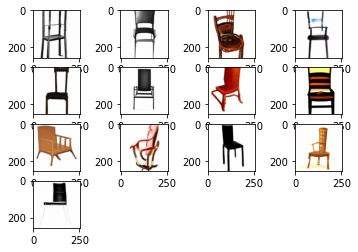

In [12]:
filtered_num = 0
filtered_file = []
Files = sorted(glob.glob(os.path.join(input_dataset, '*.jpg')))
j = 1
for rgb_file in tqdm(Files):
    img = np.array(Image.open(rgb_file))
    if not bgcolor_white(img, 0.512): # Upper and bottom line should be white
        filtered_num += 1
        filtered_file.append(rgb_file)
    else:
        plt.subplot(4,4,j)
        img = Image.fromarray(img)
        plt.imshow(img)
        j += 1
        # img.save(os.path.join(output_dataset, rgb_file.split('/')[-1]))

print("Filtered {} images, rest saved in {}".format(filtered_num, output_dataset))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 160.49it/s]


226.3053944905599
237.27037048339844
225.6199696858724
235.79440307617188
213.86568196614584
225.57813008626303
224.56808471679688
246.66671752929688
191.42049662272134
209.59890747070312
242.37376403808594
239.28387959798178
191.53216552734375
246.931640625
205.9438273111979
229.33804829915366
Filtered 8 images, rest saved in ../../dataset/pseudo_images/refrigerator_picture_with_white_background/clean


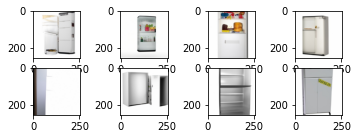

In [7]:
filtered_num = 0
filtered_file = []
Files = sorted(glob.glob(os.path.join(input_dataset, '*.jpg')))
j = 1
for rgb_file in tqdm(Files):
    img = np.array(Image.open(rgb_file))
    if not bgcolor_white(img, 0.512): # Upper and bottom line should be white
        filtered_num += 1
        filtered_file.append(rgb_file)
    else:
        plt.subplot(4,4,j)
        img = Image.fromarray(img)
        plt.imshow(img)
        j += 1
        # img.save(os.path.join(output_dataset, rgb_file.split('/')[-1]))

print("Filtered {} images, rest saved in {}".format(filtered_num, output_dataset))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 101.39it/s]


242.06930033365884
221.90612284342447
229.84341939290366
163.73843892415366
252.02236938476562
208.50821940104166
228.5913340250651
158.77050272623697
252.06949869791666
242.4316864013672
161.9348398844401
230.63487243652344
226.1964314778646
221.49622090657553
252.8475341796875
252.44323221842447
Filtered 10 images, rest saved in ../../dataset/pseudo_images/table_picture_with_white_bg/clean


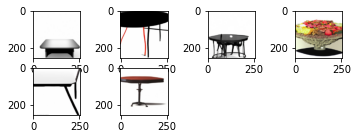

In [4]:
filtered_num = 0
filtered_file = []
Files = sorted(glob.glob(os.path.join(input_dataset, '*.jpg')))
j = 1
for rgb_file in tqdm(Files):
    img = np.array(Image.open(rgb_file))
    if not bgcolor_white(img, 0.512): # Upper and bottom line should be white
        filtered_num += 1
        filtered_file.append(rgb_file)
    else:
        plt.subplot(4,4,j)
        img = Image.fromarray(img)
        plt.imshow(img)
        j += 1
        # img.save(os.path.join(output_dataset, rgb_file.split('/')[-1]))

print("Filtered {} images, rest saved in {}".format(filtered_num, output_dataset))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 214.61it/s]


196.6943613688151
195.1746622721354
238.45508321126303
225.92403157552084
218.43526713053384
226.0107625325521
157.33696492513022
180.38829549153647
204.44030253092447
171.09597778320312
141.13539123535156
165.89627583821616
200.56346130371094
225.5795440673828
186.50823465983072
170.26163736979166
Filtered 10 images, rest saved in ../../dataset/pseudo_images/sofa_picture_with_white_bg/clean


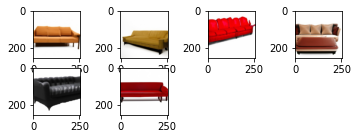

In [5]:
filtered_num = 0
filtered_file = []
Files = sorted(glob.glob(os.path.join(input_dataset, '*.jpg')))
j = 1
for rgb_file in tqdm(Files):
    img = np.array(Image.open(rgb_file))
    if not bgcolor_white(img, 0.512): # Upper and bottom line should be white
        filtered_num += 1
        filtered_file.append(rgb_file)
    else:
        plt.subplot(4,4,j)
        img = Image.fromarray(img)
        plt.imshow(img)
        j += 1
        # img.save(os.path.join(output_dataset, rgb_file.split('/')[-1]))

print("Filtered {} images, rest saved in {}".format(filtered_num, output_dataset))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 90.45it/s]


196.4057413736979
231.94146728515625
131.35687255859375
162.03992207845053
188.73206075032553
141.48068237304688
177.90962727864584
195.53540547688803
111.90848286946614
138.0101776123047
248.94557189941406
217.84391276041666
165.57320149739584
236.91625467936197
181.0191396077474
90.33798726399739
Filtered 7 images, rest saved in ../../dataset/pseudo_images/cabinet_picture_with_white_bg/clean


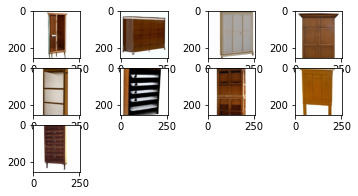

In [5]:
filtered_num = 0
filtered_file = []
Files = sorted(glob.glob(os.path.join(input_dataset, '*.jpg')))
j = 1
for rgb_file in tqdm(Files):
    img = np.array(Image.open(rgb_file))
    if not bgcolor_white(img, 0.512): # Upper and bottom line should be white
        filtered_num += 1
        filtered_file.append(rgb_file)
    else:
        plt.subplot(4,4,j)
        img = Image.fromarray(img)
        plt.imshow(img)
        j += 1
        img.save(os.path.join(output_dataset, rgb_file.split('/')[-1]))

print("Filtered {} images, rest saved in {}".format(filtered_num, output_dataset))